# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

I try to scrap Ethereum Volume Data from CoinGecko, the world's largest independent cryptocurrency data aggregator with over 13,000+ different cryptoassets tracked across more than 500+ exchanges worldwide.

I scrap 2 points from this sites, Date and Volume and then plot The Ethereum trade volume from 2020-01-01 to 2021-06-30 to see day to day fluctuation of Ethereumimport requests

url_get = requests.get('<link>')

## Import Required Library

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 

## Set User Agent to Avoid Anti Crawler so I can  access like the website as common browser not as bot

Pada saat melakukan crawler dengan menggunakan key Table, website menampilkan "cf-browser-verification cf-im-under-attack", jadi sebelum request saya menambahkan User Agents untuk menghindari Anti Crawler

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?start_date=2020-01-01&end_date=2021-06-30#panel',headers=headers)


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
t_headers = soup.find('table').find('thead').find_all('th')
t_temps = soup.find('table').find('tbody').find_all('tr')

## Scrapping Process 

In [7]:
header = []
temp = []

#looping header table
for t_header in t_headers:
    th_text = str(t_header.text).strip()
    header.append(th_text)

#looping row table
for t_temp in t_temps:
    th = t_temp.select_one('th') # if inspect from website date using th element this use to get date
    td = t_temp.findAll('td') # get td child of row as array

    td_text_date = str(th.text).strip()
    td_market_cap = str(td[0].text).strip()
    td_volume = str(td[1].text).strip()
    td_open = str(td[2].text).strip()
    td_close = str(td[3].text).strip()
    td_tuple = (td_text_date, td_market_cap, td_volume, td_open, td_close) # create tuple

    temp.append(td_tuple)

temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

## Notes

Data yang ditampilkan hanya dari tanggal 2021-05-02 sampai dengan 2021-06-30, berbeda dengan URL (end_date=2021-06-30&page=1&start_date=2020-01-01) karena 1 halaman tersebut hanya menampilkan data mulai dari tanggal 2021-05-02 

## Data Cleaning, Creating Data Frame & Data wrangling

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('td_text_date','td_market_cap','td_volume','td_open','td_close'))
df = df[['td_text_date','td_volume']]
df = df.rename({'td_text_date': 'Date', 'td_volume': 'Volume'}, axis=1) 
df = df.sort_values(by='Date',ascending=True)
df = df.set_index('Date')

df.head()

,Volume
Date,
2021-05-02,"$36,721,647,718"
2021-05-03,"$35,727,432,416"
2021-05-04,"$64,192,650,586"
2021-05-05,"$78,437,235,046"
2021-05-06,"$63,552,342,594"


In [9]:
df.dtypes

Volume    object
dtype: object

In [10]:
df['Volume'] = df['Volume'].str.replace("$","")
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].astype('float64')

/var/folders/yq/5l3dv0wn01n12dgs45q3p5q40000gq/T/ipykernel_7559/1223880185.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")


In [12]:
df.head()

,Volume
Date,
2021-05-02,3.672165e+10
2021-05-03,3.572743e+10
2021-05-04,6.419265e+10
2021-05-05,7.843724e+10
2021-05-06,6.355234e+10


In [13]:
df.dtypes

Volume    float64
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:title={'center':'Ethereum Trading (USD)'}, xlabel='Date', ylabel='Volume (USD)'>

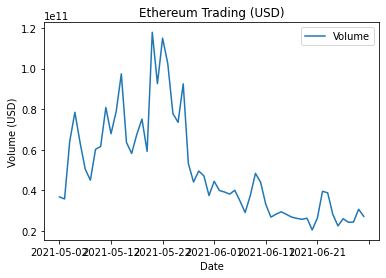

In [14]:
df.plot(title = 'Ethereum Trading (USD)', # judul plot
        xlabel = 'Date', # nama label sumbu x
        ylabel = 'Volume (USD)' # nama label sumbu y
        ) 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Ethereum Trading (USD)'}, xlabel='Date', ylabel='Volume (USD)'>

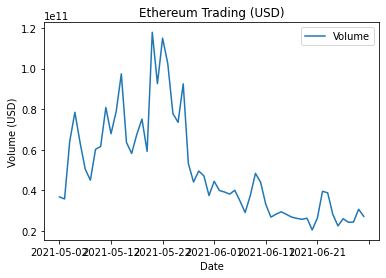

In [15]:
df.plot(title = 'Ethereum Trading (USD)', # judul plot
        xlabel = 'Date', # nama label sumbu x
        ylabel = 'Volume (USD)' # nama label sumbu y
        ) 

Ethereum transactional volume has been on a downtrend since end of May 2021. Even though the trading volume had reached USD 117.9 bn May 20th, but

On June 5th, it went as low as 1.22m $ETH

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.